In [60]:
#IMPORTING LIBRARIES 

import pandas as pd
import numpy as np 
import yfinance as yf
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

Analysing a Portfolio of Stocks

In [62]:
stocks = 'RELIANCE.NS, ADANIENT.NS, LT.NS, GAIL.NS'
end= datetime.now()
start = datetime(end.year - 5, end.month, end.day)

data = yf.download(stocks, start=start, end=end)

portfolio = data['Adj Close']
portfolio.head()


[*********************100%***********************]  4 of 4 completed


Ticker,ADANIENT.NS,GAIL.NS,LT.NS,RELIANCE.NS
Date,,,,
2019-09-16 00:00:00+00:00,144.529556,68.710144,1234.323242,1087.592041
2019-09-17 00:00:00+00:00,142.350952,69.875618,1206.855103,1075.644775
2019-09-18 00:00:00+00:00,142.747040,71.491386,1210.805542,1083.055664
2019-09-19 00:00:00+00:00,141.162613,70.484840,1194.912476,1059.116577
2019-09-20 00:00:00+00:00,147.648865,71.358948,1296.700928,1126.756836


In [17]:
portfolio.tail()

Ticker,ADANIENT.NS,GAIL.NS,LT.NS,RELIANCE.NS
Date,,,,
2024-09-10 00:00:00+00:00,2986.399902,219.929993,3596.149902,2923.050049
2024-09-11 00:00:00+00:00,2937.850098,217.190002,3536.949951,2903.000000
2024-09-12 00:00:00+00:00,2991.000000,220.639999,3622.000000,2959.600098
2024-09-13 00:00:00+00:00,2968.350098,218.869995,3613.000000,2945.250000
2024-09-16 00:00:00+00:00,2984.899902,217.830002,3662.250000,2942.699951


In [18]:
#Daily returns of the portfolio
returns = portfolio.pct_change().dropna()
print(returns)

Ticker                     ADANIENT.NS   GAIL.NS     LT.NS  RELIANCE.NS
Date                                                                   
2019-09-17 00:00:00+00:00    -0.015074  0.016962 -0.022254    -0.010985
2019-09-18 00:00:00+00:00     0.002783  0.023124  0.003273     0.006890
2019-09-19 00:00:00+00:00    -0.011100 -0.014079 -0.013126    -0.022104
2019-09-20 00:00:00+00:00     0.045949  0.012401  0.085185     0.063865
2019-09-23 00:00:00+00:00     0.022133  0.048998  0.082891    -0.012078
...                                ...       ...       ...          ...
2024-09-10 00:00:00+00:00     0.007506  0.010011  0.004988    -0.000632
2024-09-11 00:00:00+00:00    -0.016257 -0.012458 -0.016462    -0.006859
2024-09-12 00:00:00+00:00     0.018091  0.015885  0.024046     0.019497
2024-09-13 00:00:00+00:00    -0.007573 -0.008022 -0.002485    -0.004849
2024-09-16 00:00:00+00:00     0.005575 -0.004752  0.013631    -0.000866

[1237 rows x 4 columns]


In [22]:
#Defining the weights of the portfolio

weights = np.array([0.3, 0.25, 0.25, 0.2])


In [64]:
#Finding the annual portfolio retunn and covariance matrix
portfolio_return = np.sum(weights * returns.mean()) * 252
cov_matrix = returns.cov()
annual_cov_matrix = cov_matrix * 252 

#Portfolio variance
portfolio_variance = np.dot(weights.T, np.dot(annual_cov_matrix, weights))

#Portfolio standard deviation
portfolio_volatility = np.sqrt(portfolio_variance)

print("Expected Annual Return from the portfolio: {:.2%}".format(portfolio_return))
print("Annual Volatility of the portfoloo: {:.2%}".format(portfolio_volatility))

Expected Annual Return from the portfolio: 41.89%
Annual Volatility of the portfoloo: 27.81%


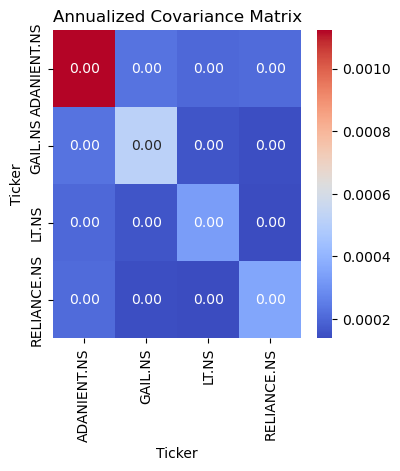

In [66]:
# SHowing the covariance matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Annualized Covariance Matrix")
plt.show()

The annualized covariance matrix shows Adani to be the stock with the maximum variance, meaning it is more risky since it's more volatile. 
Near zero covariances exist between stocks, indicating very low correlation between returns, which would provide excellent diversification benefits in the portfolio.

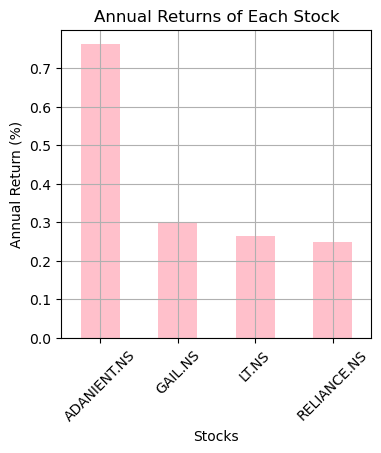

In [74]:
#Plotting the annual returns of each stock

annual_returns = returns.mean() * 252

plt.figure(figsize=(4, 4))
annual_returns.plot(kind='bar', color='pink')
plt.title("Annual Returns of Each Stock")
plt.xlabel("Stocks")
plt.ylabel("Annual Return (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

This graph shows that Adani is providing the highest annual returns whereas the other stocks are nearly providing the same amount of lower returns. 

This is also possible because of how much more risky the Adani stocks are.

EFFICIENT FRONTIERS

In [34]:
from pypfopt import risk_models, expected_returns
from pypfopt.efficient_frontier import EfficientFrontier

In [36]:
# Expected returns
mu = expected_returns.mean_historical_return(portfolio) 

#Covariance matrix
S = risk_models.sample_cov(portfolio)

print(S)

Ticker       ADANIENT.NS   GAIL.NS     LT.NS  RELIANCE.NS
Ticker                                                   
ADANIENT.NS     0.282980  0.058023  0.051179     0.052837
GAIL.NS         0.058023  0.130220  0.040718     0.036142
LT.NS           0.051179  0.040718  0.083801     0.034992
RELIANCE.NS     0.052837  0.036142  0.034992     0.089397


In [42]:
#Efficient Frontier
ef = EfficientFrontier(mu, S)

In [44]:
min_variance_weights = ef.min_volatility()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)

OrderedDict([('ADANIENT.NS', 0.01391), ('GAIL.NS', 0.1916), ('LT.NS', 0.41051), ('RELIANCE.NS', 0.38398)])


In [46]:
portfolio_performance = ef.portfolio_performance(verbose=True)

Expected annual return: 25.1%
Annual volatility: 23.7%
Sharpe Ratio: 0.97


Expected annual return: 25.1%
Annual volatility: 23.7%
Sharpe Ratio: 0.97


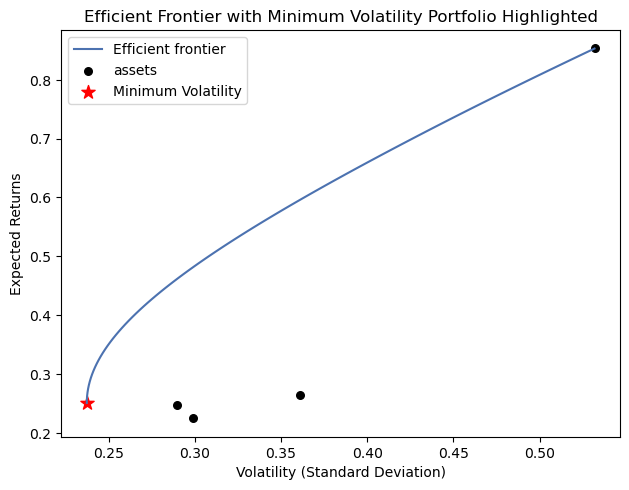

In [48]:
from pypfopt import plotting, EfficientFrontier
import matplotlib.pyplot as plt

#Expected returns and the covariance matrix
mu = expected_returns.mean_historical_return(portfolio)
S = risk_models.sample_cov(portfolio)

# Restating the efficient frontier
ef = EfficientFrontier(mu, S)

#The Minimum Volatility portfolio
min_volatility_weights = ef.min_volatility()
min_vol_perf = ef.portfolio_performance(verbose=True)

#Restating the efficient Frontier again for plotting purposes
ef_for_plotting = EfficientFrontier(mu, S)
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef_for_plotting, ax=ax, show_assets=True)
ax.scatter(min_vol_perf[1], min_vol_perf[0], marker="*", s=100, color='r', label="Minimum Volatility")
ax.legend()
plt.title('Efficient Frontier with Minimum Volatility Portfolio Highlighted')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Returns')
plt.show()

Analysis of results

Minimum Volatility Portfolio: 
This portfolio was marked with a red star, and its performance showed a low risk of volatility at 23.8% risk; the annual return was 24.9%, and thus it can be suitable for risk-averse investors.

Maximum Return Portfolio: 
It lies on the extreme right of the frontier and seeks to generate the highest possible returns at the expense of significantly increased risk, highly attracting only the risk-tolerant investors.

Risk-Return Trade-Off: 
Graphically, moving rightwards along the frontier intuitively increases the expected return with higher volatilities, characteristic of the traditional riskreturn trade-off.

Asset Allocation: 
Many other asset mixes, which are not on the frontier, are represented by the dots highlighted in black. The latter are suboptimal portfolios where they take on more risk than they need to or forgo potential return.

Calculating the VaR and CVaR of the portfolio

In [50]:
portfolio_returns = (returns * weights).sum(axis=1)

from scipy.stats import norm

# Calculate mean and standard deviation of portfolio returns
portfolio_mean = portfolio_returns.mean()
portfolio_std = portfolio_returns.std()

# Set the confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate VaR at the confidence level
VaR_parametric = norm.ppf(1 - confidence_level, portfolio_mean, portfolio_std)

# Calculate CVaR
CVaR_parametric = portfolio_mean + (norm.pdf(norm.ppf(1 - confidence_level)) * portfolio_std) / (1 - confidence_level)

In [52]:
# Calculate VaR at the confidence level
VaR_historical = portfolio_returns.quantile(1 - confidence_level)

# Calculate CVaR
CVaR_historical = portfolio_returns[portfolio_returns <= VaR_historical].mean()

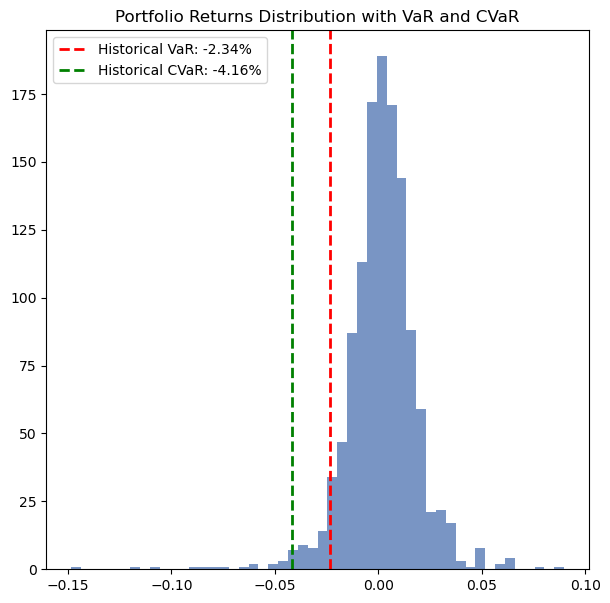

In [72]:
#Plotting the VaR and the CVaR

plt.figure(figsize=(7, 7))
plt.hist(portfolio_returns, bins=50, alpha=0.75)
plt.axvline(x=VaR_historical, color='r', linestyle='dashed', linewidth=2, label=f'Historical VaR: {VaR_historical:.2%}')
plt.axvline(x=CVaR_historical, color='g', linestyle='dashed', linewidth=2, label=f'Historical CVaR: {CVaR_historical:.2%}')
plt.title('Portfolio Returns Distribution with VaR and CVaR')
plt.legend()
plt.show()

Analysis of results

Value at Risk (VaR): 
In this respect, the VaR threshold is set to be -2.34% with an intention that the losses would not surpass this value most of the time (95% probability). That offers measurable measure of risk in normal market conditions.

Conditional Value at Risk (CVaR): 
More negative than VaR, it represents the strength of the loss once the VaR is hit. Meaning, if the portfolio will have performed poorly, these losses can be really large, at -4.16% on average.